
=== LDA SUMMARY ===
Eigenvalue 1: 6.9405+0.0000j
Eigenvalue 2: 5.4235+0.0000j
Discriminative power of component 1: 26.39-0.00j%
Discriminative power of component 2: 20.62-0.00j%
Total discriminative power: 47.00-0.00j%



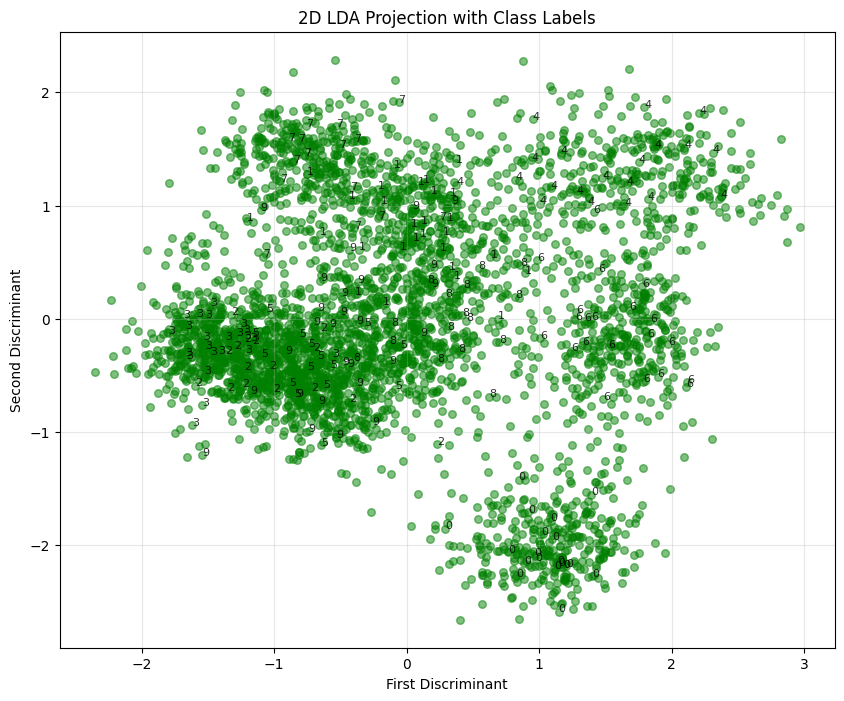

In [ ]:
#Question 3 Implementation

import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    # Separate features and labels
    X = data[:, :-1]  # All columns except the last one
    y = data[:, -1]   # Last column (class labels)
    return X, y

# Implement LDA from scratch
def lda_from_scratch(X, y, n_components=2):
    n_samples, n_features = X.shape

    # Get unique classes and their count
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    # Calculate overall mean
    overall_mean = np.sum(X, axis=0) / n_samples

    # Initialize within-class and between-class scatter matrices
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))

    # Compute class means and scatter matrices
    class_means = []
    class_counts = []

    for i, cls in enumerate(unique_classes):
        # Get samples for this class
        X_class = X[y == cls]
        n_class_samples = X_class.shape[0]

        # Calculate class mean
        class_mean = np.sum(X_class, axis=0) / n_class_samples
        class_means.append(class_mean)
        class_counts.append(n_class_samples)

        # Calculate within-class scatter matrix for this class
        for j in range(n_class_samples):
            x_centered = X_class[j] - class_mean
            S_W += np.outer(x_centered, x_centered)

        # Calculate between-class scatter matrix contribution
        mean_diff = class_mean - overall_mean
        S_B += n_class_samples * np.outer(mean_diff, mean_diff)

    # Compute S_W^-1 * S_B
    # Add small regularization to S_W for numerical stability if needed
    S_W += np.eye(n_features) * 1e-4

    # Compute eigenvectors and eigenvalues of S_W^-1 * S_B
    try:
        # Try direct computation
        inv_S_W = np.linalg.inv(S_W)
        matrix_for_eig = np.dot(inv_S_W, S_B)
    except np.linalg.LinAlgError:
        # If S_W is singular, use pseudoinverse
        inv_S_W = np.linalg.pinv(S_W)
        matrix_for_eig = np.dot(inv_S_W, S_B)

    eigenvalues, eigenvectors = np.linalg.eig(matrix_for_eig)

    # Sort eigenvectors by decreasing eigenvalues
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select top n_components eigenvectors
    W = eigenvectors[:, :n_components]

    # Convert to real if complex (due to numerical issues)
    if np.iscomplexobj(W):
        W = np.real(W)

    # Project data
    X_lda = np.dot(X - overall_mean, W)

    return X_lda, W, eigenvalues

# Function to plot the 2D projections with annotations
def plot_lda_projections(X_lda, y, num_annotations=200):
    plt.figure(figsize=(10, 8))

    # Plot all data points with one color
    plt.scatter(X_lda[:, 0], X_lda[:, 1], color='green', alpha=0.5, s=30)

    # Randomly select instances for annotation
    indices = random.sample(range(len(X_lda)), num_annotations)

    # Annotate the selected points with their class labels
    for idx in indices:
        plt.annotate(
            str(int(y[idx])),  # Convert class label to integer
            (X_lda[idx, 0], X_lda[idx, 1]),
            fontsize=8,
            alpha=0.8
        )

    plt.title('2D LDA Projection with Class Labels')
    plt.xlabel('First Discriminant')
    plt.ylabel('Second Discriminant')
    plt.grid(alpha=0.3)
    plt.savefig('lda_projection.png', dpi=300)
    plt.show()

# Function to print summary of LDA results
def print_lda_summary(eigenvalues, W):
    total_discriminability = np.sum(eigenvalues)
    explained_ratio = eigenvalues[:2] / total_discriminability

    print("\n=== LDA SUMMARY ===")
    print(f"Eigenvalue 1: {eigenvalues[0]:.4f}")
    print(f"Eigenvalue 2: {eigenvalues[1]:.4f}")
    print(f"Discriminative power of component 1: {explained_ratio[0]*100:.2f}%")
    print(f"Discriminative power of component 2: {explained_ratio[1]*100:.2f}%")
    print(f"Total discriminative power: {np.sum(explained_ratio)*100:.2f}%")
    print("===================\n")

# Main function
def main():
    # Load the data
    X, y = load_data('data.txt')

    # Implement LDA and get the 2D projections
    X_lda, W, eigenvalues = lda_from_scratch(X, y, n_components=2)

    # Print summary of LDA results
    print_lda_summary(eigenvalues, W)

    # Plot the 2D projections with annotations
    plot_lda_projections(X_lda, y, num_annotations=200)

if __name__ == "__main__":
    main()